# The XOR problem revisited with Keras
In the last session you solved the XOR problem by hand. This session you will work on a modified XOR problem and solve it with Keras.

Let's load Keras first, as well as some helper functions:

In [1]:
library(keras)
source("02-helpers.R")

Let's load the data set:

In [2]:
data <- dataset_extended_xor()

## Exercise 1
Extract the input matrix `X` and the labels `y` from the `data` object and assign them to the variables `X` and `y`.
Plot the data set using the `plot_dataset` function, by providing it with the `X` and `y` variables.

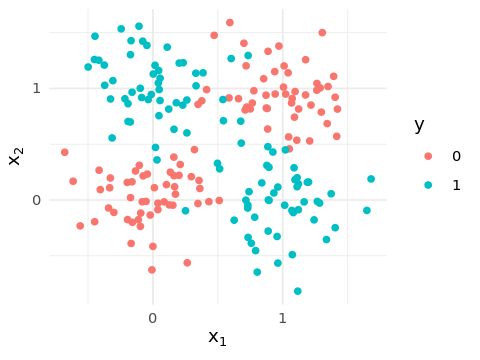

In [3]:
X <- data$X
y <- data$y
plot_dataset(X, y)

Let's build a simple Keras model with one hidden layer of four neurons and a ReLU activation function, and an output layer with one neuron with sigmoid activation. Running this cell will show a summary of the model with the different layers.

**Note**: the `%>%` operator will apply the output of the left-hand side as the **first parameter** of the right-hand side.

In [5]:
model <- keras_model_sequential() %>%
    # The input_shape parameter in the line below refers to the number of input features (x1 and x2)
    layer_dense(units = 4, input_shape = 2, activation = "relu") %>%
    layer_dense(units = 1, activation = "sigmoid")

model  # this will show a summary of the model

Model
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense_1 (Dense)                     (None, 4)                       12          
________________________________________________________________________________
dense_2 (Dense)                     (None, 1)                       5           
Total params: 17
Trainable params: 17
Non-trainable params: 0
________________________________________________________________________________



The output shape of each layer always has the batch size of the layer as its first dimension. Because the batch size is not known, this first dimension is reported as `None`.

## Exercise 2
Why do we have an output shape of `(None, 4)` in the first layer, and `(None, 1)` in the second?

In [ ]:
<FILL IN>

In [ ]:
# None is the batch size. 4 is the number of neurons in the hidden layer, 1 in the output layer.

## Exercise 3
Why do we have 12 parameters in the hidden layer, and 5 in the output layer?

**Hint**: it may help to draw the neurons and weights on a piece of paper.

In [ ]:
<FILL IN>

In [ ]:
# Hidden layer (12 parameters): 4 neurons, each with 2 inputs and one bias = (4 weight + 1 bias parameters) x 3
# Output layer (5 parameters): 1 neuron with 4 inputs and one bias = 4 weight + 1 bias parameters

We need to **compile** the model before training it to configure the learning process. We do that by specifying three parameters:
1. The optimizer - Adam, with learning rate 0.01
1. A loss function - binary cross-entropy (more on this later), since this is a two-class problem
1. A metric - accuracy, since this is a classification problem

In [6]:
model %>% compile(
    optimizer = optimizer_adam(lr = 0.01),
    loss = "binary_crossentropy",
    metrics = c("accuracy")
)
model

Model
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense_1 (Dense)                     (None, 4)                       12          
________________________________________________________________________________
dense_2 (Dense)                     (None, 1)                       5           
Total params: 17
Trainable params: 17
Non-trainable params: 0
________________________________________________________________________________



We can now train the model by using the [`fit`](https://keras.rstudio.com/reference/fit.html) function. We feed it:
1. The input data `X`
1. The labels `y`
1. The number of epochs
1. The batch size
1. A list of callbacks. We have created a single callback for you that provides some information on the training progress.

More information, such as the loss and accuracy for each epoch, is stored in the `history` object:

In [7]:
history <- model %>% fit(
    x = X,
    y = as.numeric(y) - 1, # the labels are factors, and need to be converted to an ordinary vector of zeroes and ones
    epochs = 100,
    batch_size = 16,
    callbacks=list(Progress$new())
)

Let's plot the history of the training process:

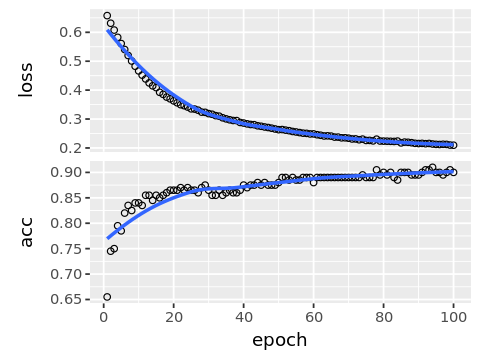

In [8]:
plot(history)

You will see the loss decrease during training, and converge after 30 or 40 epochs. The accuracy will increase, though not necessarily in proportion to the decrease in loss.

Let's plot the predictions that this model makes on the XOR data set with the `plot_predictions_keras` function we have made for you:

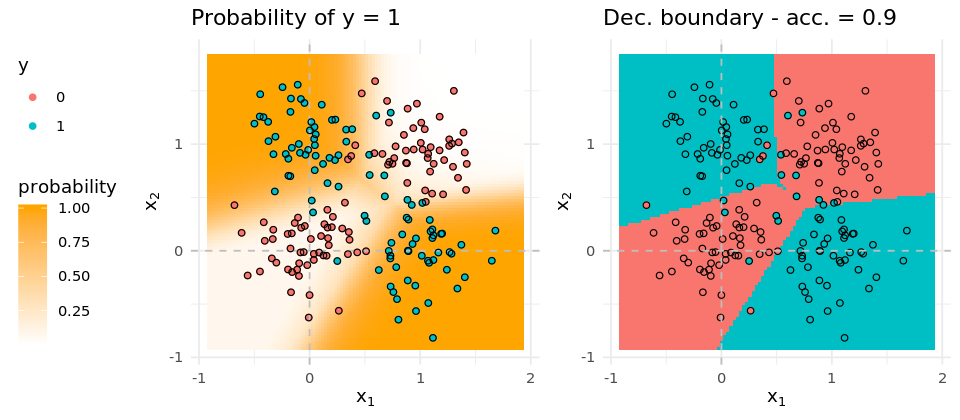

In [9]:
plot_predictions_keras(X, y, model)

The model will do reasonably well to very well, depending on how 'lucky' you were during training. The decision boundary will follow the contours of the distribution, but also miss some outliers.

Because there is a large degree of randomness involved in training a deep learning model, the performance of the model may vary considerably. This is exacerbated by the fact that we have a small data set, and a relatively large learning rate. In our test runs, accuracy at epoch 100 varied between 0.7 and 0.95, so your mileage may vary.

## Exercise 4
The goal of this exercise is to get the accuracy higher than 0.95. To do so, vary the following parameters:

1. The number of units in the hidden layer (you can try dozens, thousands, etc.)
1. The learning rate. Increase or decrease it by factors of 10 (e.g. 0.01, 0.001, 0.1, etc.)

We have provided you with a skeleton that you can fill out below:

________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense_3 (Dense)                     (None, 512)                     1536        
________________________________________________________________________________
dense_4 (Dense)                     (None, 1)                       513         
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
________________________________________________________________________________


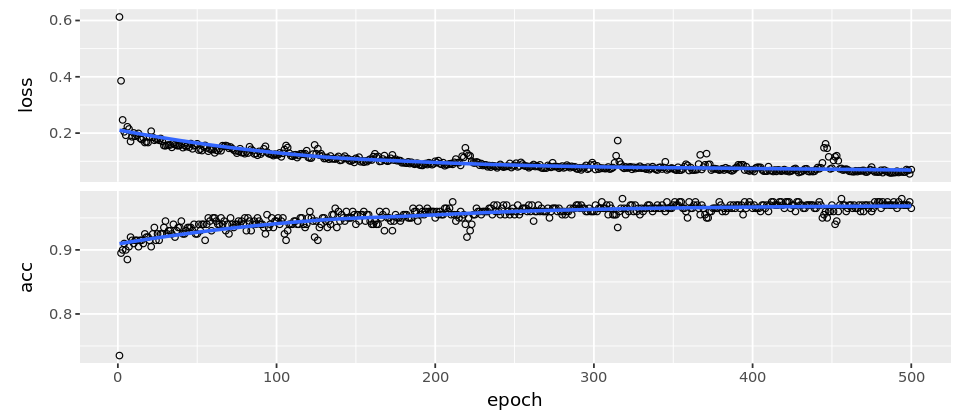

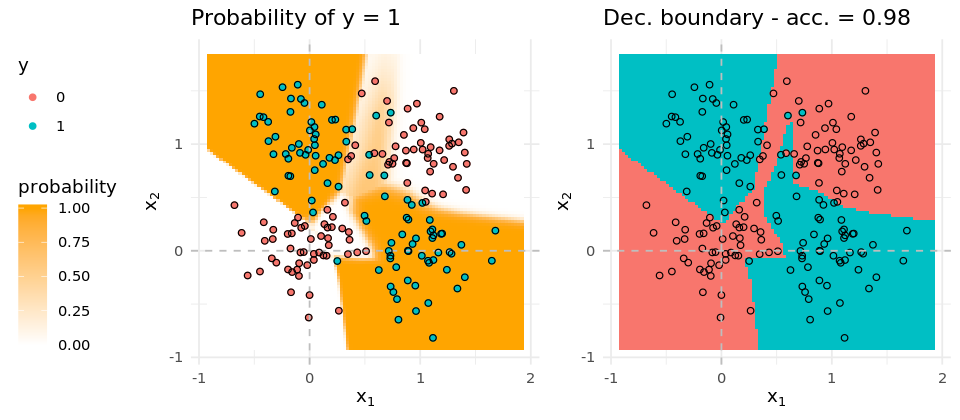

In [10]:
model <- keras_model_sequential() %>%
    layer_dense(units = 512, input_shape = 2, activation = "relu") %>%
    layer_dense(units = 1, activation = "sigmoid")

cat(summary(model))

model %>% compile(
    optimizer = optimizer_adam(lr = 0.01),
    loss = "binary_crossentropy",
    metrics = c("accuracy")
)

history <- model %>% fit(
    x = X,
    y = as.numeric(y) - 1, # the labels are factors, and need to be converted to an ordinary vector of zeroes and ones
    epochs = 500,
    batch_size = 16,
    callbacks=list(Progress$new())
)
plot(history)
plot_predictions_keras(X, y, model)

## Exercise 5
Add more hidden layers to your network, and try to classify the data set perfectly. That is: accuracy is equal to 1.

**Hints**:
1. Be careful adding too many layers, as the number of trainable parameters increases very quickly
1. You may need to modify the learning rate when adding more layers
1. As in exercise 4, increasing the number of epochs may help to increase accuracy

________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense_5 (Dense)                     (None, 512)                     1536        
________________________________________________________________________________
dense_6 (Dense)                     (None, 512)                     262656      
________________________________________________________________________________
dense_7 (Dense)                     (None, 512)                     262656      
________________________________________________________________________________
dense_8 (Dense)                     (None, 1)                       513         
Total params: 527,361
Trainable params: 527,361
Non-trainable params: 0
________________________________________________________________________________


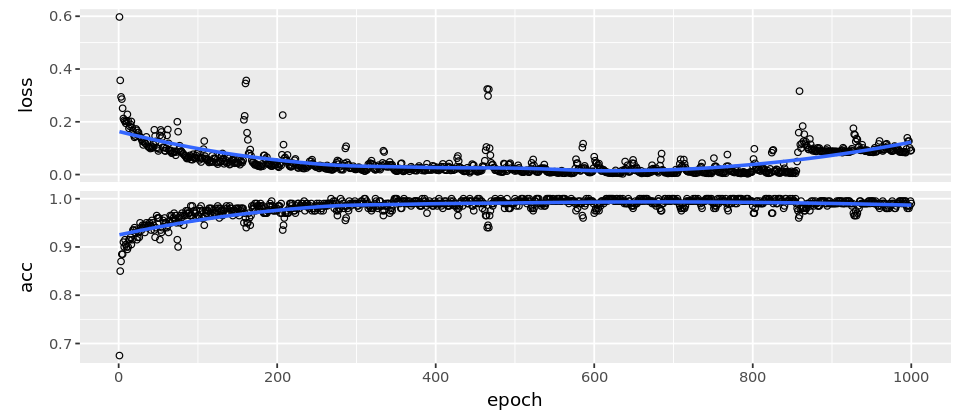

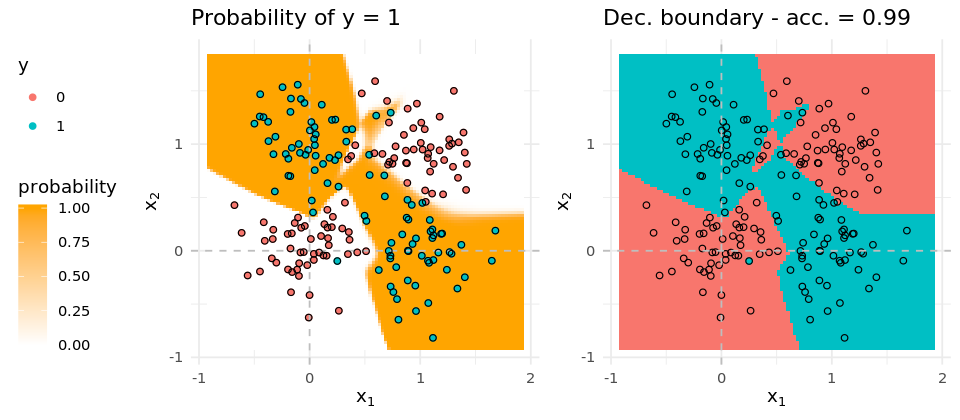

In [11]:
model <- keras_model_sequential() %>%
    layer_dense(units = 512, input_shape = 2, activation = "relu") %>%
    layer_dense(units = 512, input_shape = 2, activation = "relu") %>%
    layer_dense(units = 512, input_shape = 2, activation = "relu") %>%
    layer_dense(units = 1, activation = "sigmoid")

cat(summary(model))

model %>% compile(
    optimizer = optimizer_adam(lr = 0.001),
    loss = "binary_crossentropy",
    metrics = c("accuracy")
)

history <- model %>% fit(
    x = X,
    y = as.numeric(y) - 1, # the labels are factors, and need to be converted to an ordinary vector of zeroes and ones
    epochs = 1000,
    batch_size = 16,
    callbacks=list(Progress$new())
)
plot(history)
plot_predictions_keras(X, y, model)

## Exercise 6
Do you think this is a reasonable model? Why?

**Hint**: do you think this model will generalise well to more samples drawn from the same distribution?

In [ ]:
<FILL IN>

In [ ]:
# If the data set fits perfectly, your decision boundary will not be smooth, but have small islands and protrusions
# to fit perfectly to outliers. These will be specific to your current data set, but not to a similar data set taken 
# from the same distribution. The network has become overly specific to this particular dataset (it has memorised it
# perfectly), and will have reduced accuracy on a slightly different one.

## Exercise 7: bonus
We have prepared another artificial data set for you, looking like a noisy checkerboard. It is slightly more complicated than the modified XOR problem of the previous exercises.

Try to solve the problem in a way that generalises well. That is: when presented with new samples from the same problem, the accuracy of the model will be comparable. Validate your trained model with the dataset returned by the function `dataset_checkerboard_validation`.

**Hint**: you can try increasing the batch size to speed up the training process.

In [12]:
data <- dataset_checkerboard()
<FILL IN>

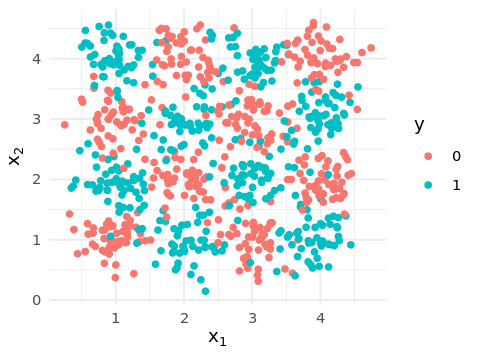

In [13]:
X <- data$X
y <- data$y
plot_dataset(X, y)

________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense_9 (Dense)                     (None, 64)                      192         
________________________________________________________________________________
dense_10 (Dense)                    (None, 32)                      2080        
________________________________________________________________________________
dense_11 (Dense)                    (None, 1)                       33          
Total params: 2,305
Trainable params: 2,305
Non-trainable params: 0
________________________________________________________________________________


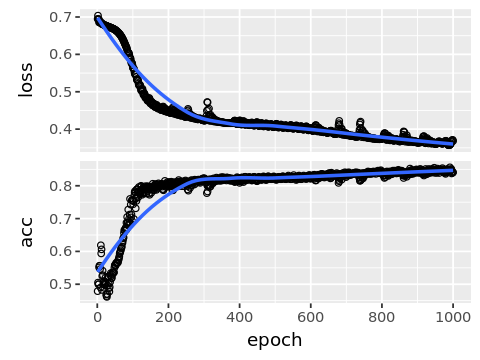

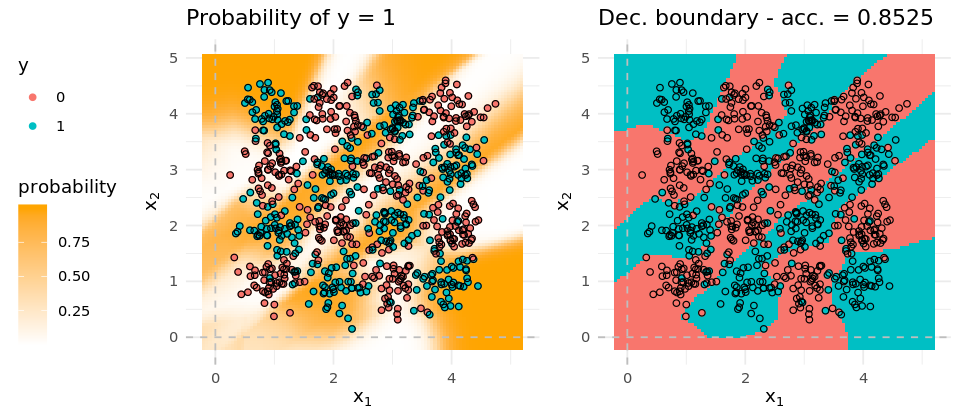

In [14]:
model <- keras_model_sequential() %>%
    layer_dense(units = 64, input_shape = 2, activation = "relu") %>%
    layer_dense(units = 32, activation = "relu") %>%
    layer_dense(units = 1, activation = "sigmoid")

cat(summary(model))

model %>% compile(
    optimizer = optimizer_adam(lr = 0.01),
    loss = "binary_crossentropy",
    metrics = c("accuracy")
)

history <- model %>% fit(
    x = X,
    y = as.numeric(y) - 1, # the labels are factors, and need to be converted to an ordinary vector of zeroes and ones
    epochs = 1000,
    batch_size = 1024,
    shuffle = TRUE,
    callbacks=list(Progress$new())
)
plot(history)
plot_predictions_keras(X, y, model)

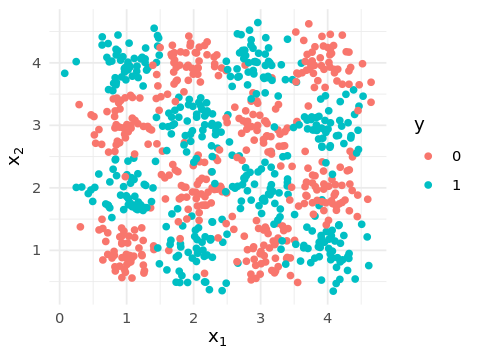

In [15]:
data_val <- dataset_checkerboard_validation()
X_val <- data_val$X
y_val <- data_val$y

plot_dataset(X_val, y_val)

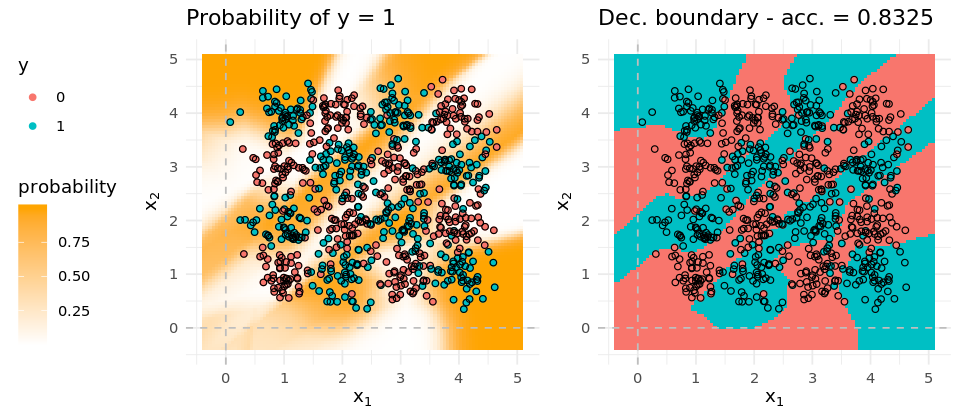

In [16]:
plot_predictions_keras(X_val, y_val, model)